# Filtracja bilateralna

## Konwolucja obrazu z filtrem o zadanych współczynnikach

Splot (konwolucję) obrazu wejściowego $I$ z filtrem $\psi$ dla ustalonego punktu obrazu $\mathbf{x}$ można przedstawić następująco:

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||)I(\mathbf{p})
\tag{1}
\end{equation}

gdzie:
- $\hat{I}$ jest obrazem wynikowym (przefiltrowanym),
- $W_N = \sum_y \psi(y)$ jest parametrem normalizującym współczynniki filtra $\psi$,
- $||\cdot||$ jest odległością między punktami obrazu $\mathbf{x}$ i $\mathbf{p}$ według ustalonej metryki (np. norma $L_2$). Uwaga, proszę pamiętać, że zarówno $\mathbf{x}$, jak i $\mathbf{p}$ to współrzędne przestrzenne,
- $\eta(\mathbf{x})$ jest otoczeniem punktu $\mathbf{x}$.

Funkcja $\psi$ decyduje o charakterze filtracji. Dla filtru Gaussowskiego:

\begin{equation}
\psi(y) = G_{\delta_s}(y)
\tag{2}
\end{equation}

gdzie: $G_{\delta_s}(y)$ jest funkcją Gaussa z parametrem skali $\delta_s$.

Opisaną powyżej filtrację realizowaliśmy w ramach ćwiczenia "Przetwarzanie wstępne. Filtracja kontekstowa."

## Filtracja bilateralna

Wadą klasycznego splotu jest brak adaptacji współczynników filtra do lokalnego otoczenia $\eta(\mathbf{x})$ filtrowanego punktu $\mathbf{x}$.
Oznacza to wykorzystanie tych samych współczynników filtra $\psi$ niezależnie od tego czy otoczenie jest względnie jednorodne lub zawiera krawędzie obiektów (w tym przypadku dochodzi do "rozmywania" krawędzi).
Filtracja bilateralna uwzględnia lokalne otoczenie filtrowanego punktu, w ten sposób, że parametry filtra zmieniają się w zależności od "wyglądu" otoczenia.


Współczynniki filtra obliczane są na podstawie odległości filtrowanego punktu $\mathbf{x}$ od każdego punktu otoczenia $\mathbf{p}$ w dziedzinie przestrzennej obrazu (tak jak przy typowym filtrze np. Gaussa) oraz odległości punktów w przeciwdziedzinie obrazu (np. na podstawie różnicy w jasności pikseli dla obrazu w odcieniach szarości):

\begin{equation}
\hat{I}(\mathbf{x}) = \frac{1}{W_N}\sum_{\mathbf{p} \in \eta(\mathbf{x})} \psi(||\mathbf{p}-\mathbf{x}||) \gamma(|I(\mathbf{p}) - I(\mathbf{x})|) I(\mathbf{p})
\tag{3}
\end{equation}
gdzie:
- $W_N$ jest współczynnikiem normalizującym filtr,
- $\gamma$ jest funkcją odległości w przeciwdziedzinie obrazu, np. $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$
- parametr $\delta_r$ jest utożsamiany z poziomem szumu w obrazie i należy go dobrać w sposób empiryczny.

Proszę chwilę zastanowić się nad powyższym równaniem, w szczególności nad funkcją $\gamma$. Proszę wyznaczyć, jaka będzie wartość funkcji dla pikseli podobnych (różnica 0, 1, 2), a skrajnie różnych (255, 200).

##  Realizacja ćwiczenia

### Wczytanie danych

1. Wczytaj dane z pliku *MR_data.mat*. W tym celu wykorzystaj funkcję `loadmat` z pakietu scipy:
        from scipy.io import loadmat
        mat = loadmat('MR_data.mat')

2. Wczytany plik zawiera 5 obrazów: *I_noisefree*, *I_noisy1*, *I_noisy2*, *I_noisy3* oraz *I_noisy4*. Odczytać je można w następujący sposób:
        Input = mat['I_noisy1']

3. Wyświetl wybrany obraz z pliku *MR_data.mat*. Zagadka - co to za obrazowanie medyczne?

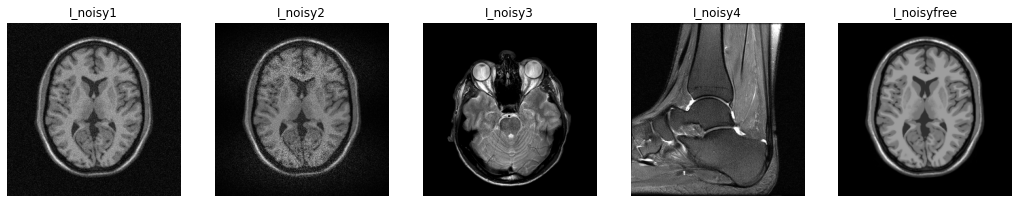

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.io import loadmat
import math
import os

if not os.path.exists("MR_data.mat") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/MR_data.mat --no-check-certificate

#TODO Samodzielna

mat = loadmat('MR_data.mat')

Input_0 = mat['I_noisy1']
Input_1 = mat['I_noisy2']
Input_2 = mat['I_noisy3']
Input_3 = mat['I_noisy4']
Input_4 = mat['I_noisefree']

fig, ax = plt.subplots(1, 5)
fig.set_size_inches((18, 10))
ax[0].imshow(Input_0, 'gray')
ax[0].set_title('I_noisy1')
ax[0].axis('off')
ax[1].imshow(Input_1, 'gray')
ax[1].set_title('I_noisy2')
ax[1].axis('off')
ax[2].imshow(Input_2, 'gray')
ax[2].set_title('I_noisy3')
ax[2].axis('off')
ax[3].imshow(Input_3, 'gray')
ax[3].set_title('I_noisy4')
ax[3].axis('off')
ax[4].imshow(Input_4, 'gray')
ax[4].set_title('I_noisyfree')
ax[4].axis('off')
plt.show()

### "Klasyczna" konwolucja

1. Zdefiniuj parametry filtra Gaussowskiego: rozmiar okna i wariancję $\delta_S$.
2. Oblicz współczynniki filtra na podstawie zdefiniowanych parametrów (najprościej w ramach podwójnej pętli for).
2. Sprawdź ich poprawność i zwizualizuj filtr (tak jak w ćwiczeniu pt. "Przetwarzanie wstępne. Filtracja kontekstowa.").
3. Wykonaj kopię obrazu wejściowego: `IConv = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentem tej funkcji są aktualnie przetwarzane okno i współczynniki filtra.
7. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
8. Wyświetl wynik filtracji.
9. Porównaj wynik z obrazem oryginalnym.

In [2]:
def fgaussian(size, sigma):
    # funkcja fgaussian obliczona raz jest aktualna dla wszystkich otoczeń pikseli w obrazku (poza ramkami)
    # przy zdefimiowanej w tej funkcji normie, dodatkowo normalizując współczynniki filtra
    m = n = size
    h, k = m // 2, n // 2
    x, y = np.mgrid[-h:h + 1, -k:k + 1]
    
    l_2 = (x ** 2 + y ** 2)**(1/2)  # norma l_2
    g = np.exp(-(l_2 / (2 * sigma ** 2)))
    
    return g / g.sum()

               
def convolution(img, window_size, delta_s):
    IConv = img.copy()
    X, Y = IConv.shape
    half_size = window_size // 2

    filtr = fgaussian(window_size, delta_s)

    for i in range(0 + half_size, X - half_size):
        for j in range(0 + half_size, Y - half_size):
            p = img[i - half_size:i + half_size + 1, j - half_size:j + half_size + 1]

            # element funkcji obliczającej nową wartość piksela
            # (nie definiowałem osobnej funkcji gdyż są to 2 linijki kodu)
            cos = np.array(filtr * p)
            I_x = cos.sum()
    
            IConv[i][j] = int(I_x)

    return IConv

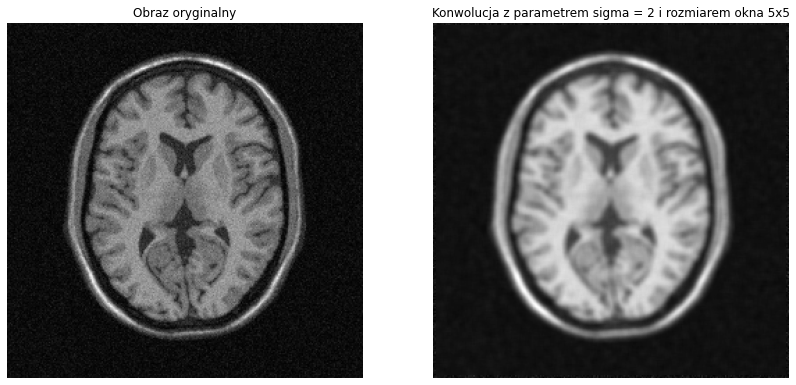

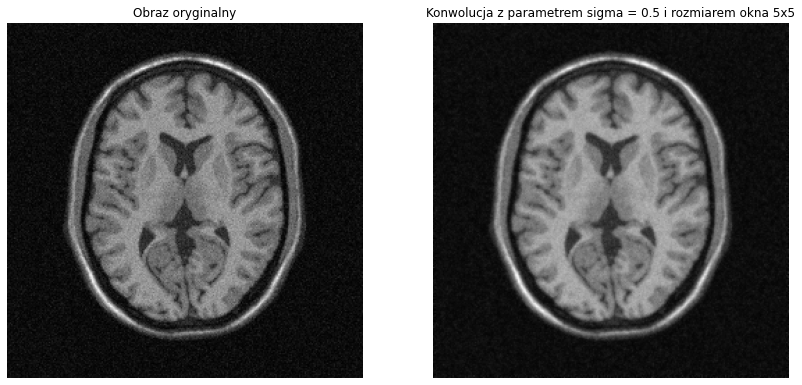

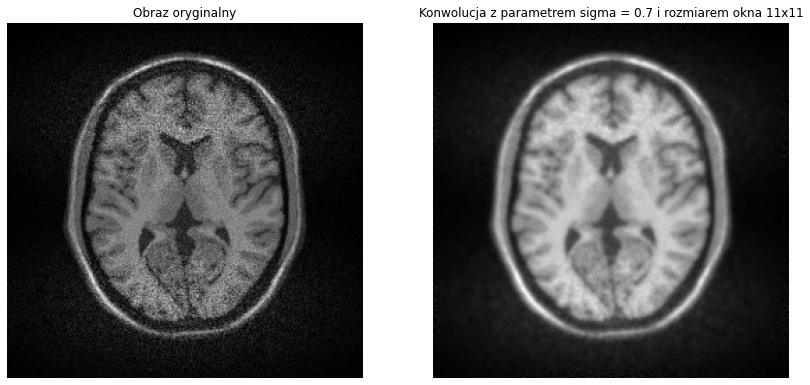

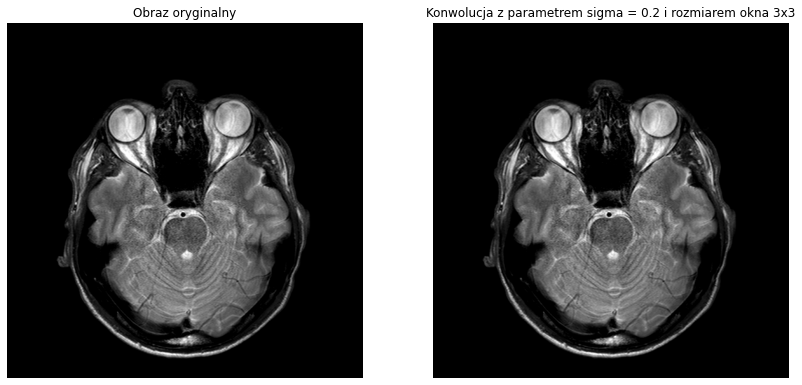

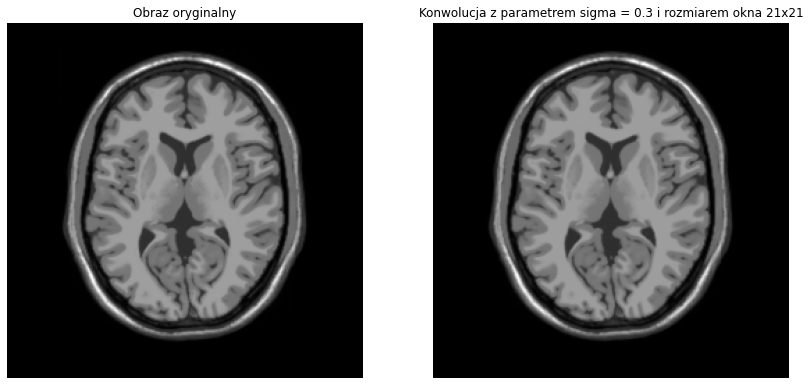

In [3]:
def show_conv(img, window_size, sigma):
    img_conv = convolution(img, window_size, sigma)

    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches((14, 10))
    ax[0].imshow(img, 'gray')
    ax[0].set_title('Obraz oryginalny')
    ax[0].axis('off')
    ax[1].imshow(img_conv, 'gray')
    ax[1].set_title(f'Konwolucja z parametrem sigma = {sigma} i rozmiarem okna {window_size}x{window_size}')
    ax[1].axis('off')
    plt.show()
    
show_conv(Input_0, 5, 2)
show_conv(Input_0, 5, 0.5)
show_conv(Input_1, 11, 0.7)
show_conv(Input_2, 3, 0.2)
show_conv(Input_4, 21, 0.3)

### Filtracja bilateralna

1. Zdefiniuj dodatkowy parametr: wariancję $\delta_R$.
3. Wykonaj kopię obrazu wejściowego: `IBilateral = Input.copy()`
4. Wykonaj podwójną pętlę po obrazie. Pomiń ramkę, dla której nie jest zdefiniowany kontekst o wybranej wielkości.
5. W każdej iteracji stwórz dwuwymiarową tablicę zawierającą aktualny kontekst.
6. Napisz funkcję, która będzie obliczała nową wartość piksela.
Argumentami funkcji są aktualnie przetwarzane okno, współczynniki filtra gaussowskiego (takie same jak wcześniej) i wariancja $\delta_R$.
7. Oblicz odległość w przeciwdziedzinie (dla wartości pikseli).
8. Oblicz funkcję Gaussa dla obliczonych odległości z zadanym parametrem.
9. Wykonaj normalizację obliczonych współczynników.
10. Obliczoną wartość przypisz do odpowiedniego piksela kopii obrazu wejściowego.
11. Wyświetl wynik filtracji.
12. Porównaj wynik z obrazem oryginalnym.

### Wyznaczenie wartości funkcji $\gamma(y)=\exp(-\frac{y^2}{2\delta_r^2})$ dla podanych wartości $y$  oraz $\delta_r$, gdzie $y$ to różnica wartości w pikselach:

In [4]:
gamma = lambda y, delta_r: np.exp(-y**2/(2*delta_r**2))

print("Dla y = 255- 200 oraz delta_r = 1 wartość funkcji wynosi: ", gamma(55, 1))
print("Dla y = 2 - 1 oraz delta_r = 1 wartość funkcji wynosi: ", gamma(1, 1))
print()
print("Dla y = 255- 200 oraz delta_r = 5 wartość funkcji wynosi: ", gamma(55, 5))
print("Dla y = 2 - 1 oraz delta_r = 5 wartość funkcji wynosi: ", gamma(1, 5))
print()
print("Dla y = 255- 200 oraz delta_r = 50 wartość funkcji wynosi: ", gamma(55, 50))
print("Dla y = 2 - 1 oraz delta_r = 50 wartość funkcji wynosi: ", gamma(1, 50))

Dla y = 255- 200 oraz delta_r = 1 wartość funkcji wynosi:  0.0
Dla y = 2 - 1 oraz delta_r = 1 wartość funkcji wynosi:  0.6065306597126334

Dla y = 255- 200 oraz delta_r = 5 wartość funkcji wynosi:  5.311092249679095e-27
Dla y = 2 - 1 oraz delta_r = 5 wartość funkcji wynosi:  0.9801986733067553

Dla y = 255- 200 oraz delta_r = 50 wartość funkcji wynosi:  0.5460744266397094
Dla y = 2 - 1 oraz delta_r = 50 wartość funkcji wynosi:  0.9998000199986667


### Jak widać jest bardzo duża rozbieżność w wynikach funkcji dla pikseli podobnych a skrajnie różnych, co jest przydatną własnością w filtrowaniu szumu

In [5]:
gamma = lambda y, delta_r: np.exp(-y**2/(2*delta_r**2))

def fgaussian(size, sigma):
    # funkcja fgaussian obliczona raz jest aktualna dla wszystkich otoczeń pikseli w obrazku (poza ramkami)
    # przy zdefimiowanej w tej funkcji normie, dodatkowo normalizując współczynniki filtra
    m = n = size
    h, k = m // 2, n // 2
    x, y = np.mgrid[-h:h + 1, -k:k + 1]
    
    l_2 = (x ** 2 + y ** 2)**(1/2)  # norma l_2
    g = np.exp(-(l_2 / (2 * sigma ** 2)))
    
    return g / g.sum()

               
def bilateral(img, window_size, delta_s, delta_r):
    IBilateral = img.copy()
    X, Y = IBilateral.shape
    half_size = window_size // 2

    filtr = fgaussian(window_size, delta_s)

    for i in range(0 + half_size, X - half_size):
        for j in range(0 + half_size, Y - half_size):
            p = img[i - half_size:i + half_size + 1, j - half_size:j + half_size + 1]

            # element funkcji obliczającej nową wartość piksela
            # (nie definiowałem osobnej funkcji gdyż jest to prosty kod)
            I_x = 0
            for m in range(len(p)):
                for n in range(len(p[m])):
                    y = np.abs(p[m][n] - img[i][j]) 
                    I_x += filtr[m][n] * gamma(y, delta_r) * p[m][n]
            
            IBilateral[i][j] = int(I_x)

    return IBilateral

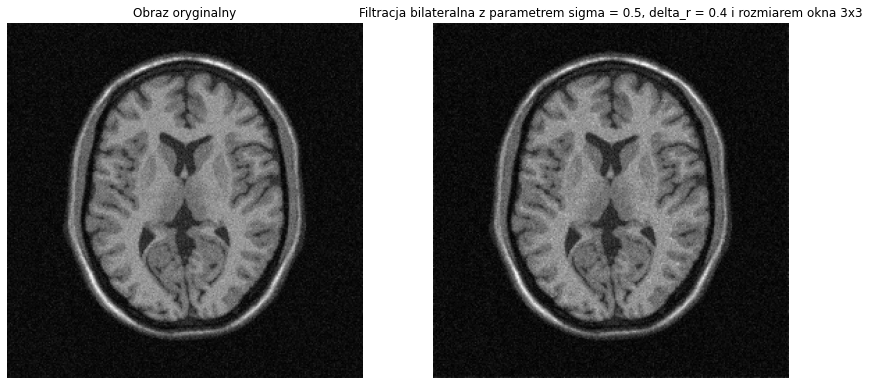

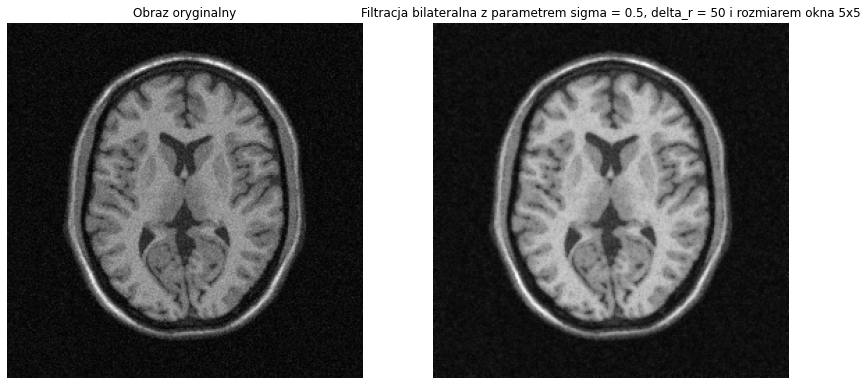

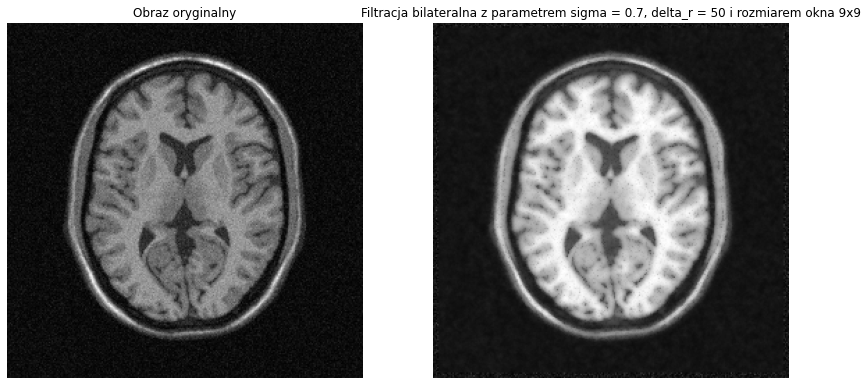

C:\Users\Tomek\AppData\Local\Temp\ipykernel_21356\3162394736.py:32: RuntimeWarning: overflow encountered in ubyte_scalars
  y = np.abs(p[m][n] - img[i][j])


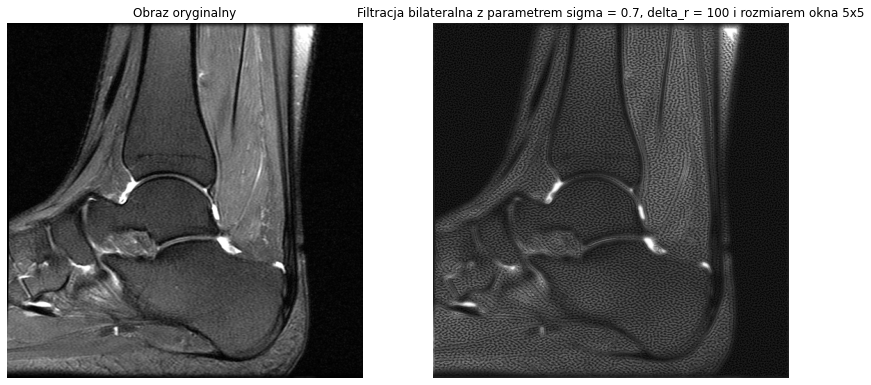

In [6]:
def show_bilateral(img, window_size, sigma, delta_r):
    img_bila = bilateral(img, window_size, sigma, delta_r)

    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches((14, 10))
    ax[0].imshow(img, 'gray')
    ax[0].set_title('Obraz oryginalny')
    ax[0].axis('off')
    ax[1].imshow(img_bila, 'gray')
    ax[1].set_title(f'Filtracja bilateralna z parametrem sigma = {sigma}, delta_r = {delta_r} i rozmiarem okna {window_size}x{window_size}')
    ax[1].axis('off')
    plt.show()

show_bilateral(Input_0, 3, 0.5, 0.4)
show_bilateral(Input_0, 5, 0.5, 50)
show_bilateral(Input_0, 9, 0.7, 50)
show_bilateral(Input_3, 5, 0.7, 100)

### Jak widać, żeby osiągnąć najlepszy efekt działania filtracji należy trochę poeksperymentować z parametrami. Osobiście szukałbym $\delta_s$ z zakresu $(0.2, 1)$, rozmiaru okna z zakresu $(3x3, 11x11)$ oraz $\delta_r$ z zakresu $(10, 100)$